<a href="https://colab.research.google.com/github/andreiamferreira/inferential-statistics/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE DE VARIÂNCIA - ANOVA**

**Membros do Grupo:** Andréia Martins, Janiner Severo e Sibila Silva

# **INTRODUÇÃO**

Utilizaremos ANOVA, que se refere a um teste paramétrico, onde podemos  verificar se existem diferenças entre as médias de uma determinada variável resposta em relação a um tratamento com dois ou mais grupos. Iremos aplicar a ANOVA em nosso Dataset para fazermos a comparação de variáveis quantitativas.

In [ ]:
!pip install researchpy

In [ ]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt

In [ ]:
df_respostas = pd.read_excel("/content/drive/MyDrive/UFCSPA/NONO SEMESTRE/Estatística Inferencial/respostas.xlsx",
                             sheet_name='Respostasaoform')

df_respostas.head(14)

,Carimbo de data/hora,Idade,Genero,Peso,Curso,Ano,AtivExtracurricular,AtivFisica,Motivo,Vidatvfísica,Atvfísicapratica,Frequenciatvfisica
0,2024-04-05 13:32:31.279,23,Feminino,75.0,Informática Biomédica,5,Sim,Não,Falta de tempo,Sim,NaN,NaN
1,2024-04-05 13:36:57.690,20,Feminino,53.0,Farmácia,3,Sim,Sim,NaN,NaN,Musculação,3.0
2,2024-04-05 13:38:06.018,24,Feminino,56.7,Farmácia,3,Sim,Não,Falta de tempo,Sim,NaN,NaN
3,2024-04-05 13:39:12.581,18,Feminino,64.0,Farmácia,1,Não,Sim,NaN,NaN,"Musculação, Corrida/caminhada",6.0
4,2024-04-05 13:39:30.622,22,Masculino,94.0,Farmácia,6,Sim,Sim,NaN,NaN,"Musculação, Esportes coletivos (ex.: futebol, ...",6.0
5,2024-04-05 13:39:43.838,22,Feminino,60.0,Farmácia,2,Sim,Sim,NaN,NaN,"Musculação, Dança",2.0
6,2024-04-05 13:41:05.693,23,Masculino,80.0,Informática Biomédica,4,Sim,Sim,NaN,NaN,"Musculação, Corrida/caminhada",3.0
7,2024-04-05 13:41:05.858,24,Feminino,70.0,Informática Biomédica,5,Sim,Não,Falta de tempo,Sim,NaN,NaN
8,2024-04-05 13:44:20.366,17,Não-binárie,51.0,Farmácia,1,Não,Não,Falta de tempo,Sim,NaN,NaN
9,2024-04-05 13:44:49.874,20,Feminino,50.0,Farmácia,1,Não,Não,Falta de tempo,Sim,NaN,NaN


# **A partir do nosso Dataset, faremos os cálculos da ANOVA.**

In [ ]:
# Obtendo a estatística descritiva da variável quantitativa de nossa base de dados
rp.summary_cont(df_respostas['Ano'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Ano,86.0,2.6395,1.5637,0.1686,2.3043,2.9748


## Sobre as descritivas:

**Variable:** A variável é o Ano do curso que cada aluno está cursando;      
**N:** Quantidade de elementos. No caso, temos 86 indivíduos;

**Mean:** A média da variável da variável é 2.64.

**SD:** Desvio padrão da libido é de 1.56;

**SE:** Erro Padrão = SD/raiz(n) da libido é 0.17;

**O intervalo de confiança 95% vai de 2.30 a 2,97.**

In [ ]:
# Estatística Descritiva da nossa variável quantitativa em relação a uma variável qualitativa:
rp.summary_cont(df_respostas['Ano'].groupby(df_respostas['Genero']))

,N,Mean,SD,SE,95% Conf.,Interval
Genero,,,,,,
Feminino,61,2.4754,1.4213,0.1820,2.1114,2.8394
Masculino,23,3.0870,1.8565,0.3871,2.2841,3.8898
Não-binárie,1,1.0000,NaN,NaN,NaN,NaN
Prefiro não dizer,1,4.0000,NaN,NaN,NaN,NaN


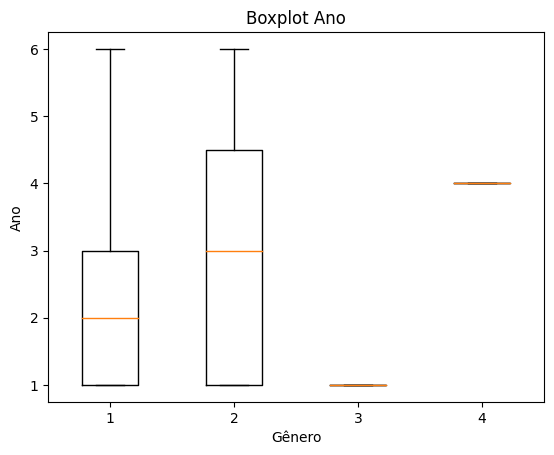

In [ ]:
# Boxplot (Gráfico para mostrar distribuição)
fig1, ax1 = plt.subplots()

df_anova = [df_respostas[df_respostas['Genero']=='Feminino']['Ano'], df_respostas[df_respostas['Genero']=='Masculino']['Ano'],
            df_respostas[df_respostas['Genero']=='Não-binárie']['Ano'],
            df_respostas[df_respostas['Genero']=='Prefiro não dizer']['Ano']]
ax1.set_title('Boxplot Ano')
ax1.set_ylabel('Ano')
ax1.set_xlabel('Gênero')
ax1.boxplot(df_anova)

plt.show()

## Rodando a ANOVA

In [ ]:
# Realizando o teste ANOVA
stats.f_oneway(df_respostas['Ano'][df_respostas['Genero'] == 'Feminino'],
             df_respostas['Ano'][df_respostas['Genero'] == 'Masculino'],
             df_respostas['Ano'][df_respostas['Genero'] == 'Não-binárie'],
             df_respostas['Ano'][df_respostas['Genero'] == 'Prefiro não dizer'])

F_onewayResult(statistic=1.4962896155841192, pvalue=0.22169099106495183)

Olhando para o p-valor, temos que existe diferenças nas médias, mas não sabemos onde.
O modelo é significante como um todo, F(1,4963) e p=0.2217

In [ ]:
# Obtem mais informacoes
results = ols('Ano ~ C(Genero)', data=df_respostas).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Ano   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.496
Date:                Fri, 19 Jul 2024   Prob (F-statistic):              0.222
Time:                        22:26:29   Log-Likelihood:                -157.68
No. Observations:                  86   AIC:                             323.4
Df Residuals:                      82   BIC:                             333.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          2.4754      0.198     12.472      0.000       2.081       2.870
C(Genero)[T.Masculino]             0.6115      0.379      1.612      0.111      -0.143       1.366
C(Genero)[T.Não-binárie]          -1.4754      1.563     -0.944      0.348      -4.584       1.633
C(Genero)[T.Prefiro não dizer]     1.5246      1.563      0.976      0.332      -1.584       4.633
==============================================================================
Omnibus:                        6.358   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.681
Skew:                           0.442   Prob(JB):                       0.0963
Kurtosis:                       2.275   Cond. No.                         9.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Obtendo a tabela ANOVA
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Genero),10.786380,3.0,1.49629,0.221691
Residual,197.039202,82.0,NaN,NaN


In [ ]:
# Cria uma tabela para mostrar vários resultados
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Genero),10.786380,3.0,3.595460,1.49629,0.221691,0.051901,0.017018
Residual,197.039202,82.0,2.402917,NaN,NaN,NaN,NaN


**Em relação as métricas:**

- **Sum_sq:** variação explicada
- gl: grau de liberdade.
- **média_sq:** A média quadrada é desejada porque elimina o viés presente no SSM e SSR, e também é usada para calcular a estatística F e ômega ao quadrado.
- **Eta_sql** é o eta-quadrado, que é analógico ao r-quadrado.

## Verificações de suposições

In [ ]:
results.diagn

{'jb': 4.680817183976069,
 'jbpv': 0.09628828756901572,
 'skew': 0.44181805546668207,
 'kurtosis': 2.275112569825752,
 'omni': 6.358310704016241,
 'omnipv': 0.04162079519967147,
 'condno': 9.833197086935547,
 'mineigval': 0.9672255198105169}

Esses são os mesmos diagnósticos anteriores da parte inferior da tabela de regressão, Jarque-Bera (jb; jbpv é o valor p) testa a suposição de normalidade, Omnibus (omni; omnipv é o valor p) testa a suposição de homogeneidade de variância, e o Número de Condição (condno) avalia a multicolinearidade(é uma situação em que duas ou mais variáveis independentes em um modelo de regressão encontram-se altamente correlacionadas). Valores de número de condição acima de 20 são indicativos de multicolinearidade.

In [ ]:
# Homogeneidade de variância
stats.levene(df_respostas['Ano'][df_respostas['Genero'] == 'Feminino'],
             df_respostas['Ano'][df_respostas['Genero'] == 'Masculino'],
             df_respostas['Ano'][df_respostas['Genero'] == 'Não-binárie'],
             df_respostas['Ano'][df_respostas['Genero'] == 'Prefiro não dizer'])


LeveneResult(statistic=2.2573432389979717, pvalue=0.08786174604809324)

In [ ]:
# Normalidade
stats.shapiro(results.resid)

ShapiroResult(statistic=0.9274443984031677, pvalue=0.00012467334454413503)

In [ ]:
#Comparação

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df_respostas['Ano'], df_respostas['Genero'])
mc_results = mc.tukeyhsd()
print(mc_results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1         group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
   Feminino         Masculino   0.6115 0.3775 -0.3832 1.6063  False
   Feminino       Não-binárie  -1.4754 0.7812 -5.5738  2.623  False
   Feminino Prefiro não dizer   1.5246 0.7637 -2.5738  5.623  False
  Masculino       Não-binárie   -2.087 0.5543 -6.2396 2.0657  False
  Masculino Prefiro não dizer    0.913 0.9388 -3.2396 5.0657  False
Não-binárie Prefiro não dizer      3.0 0.5226 -2.7491 8.7491  False
-------------------------------------------------------------------


In [ ]:
## COMPARAÇÃO PÓS-HOC DA CORREÇÃO DE BONFERRONI
stats.ttest_ind(df_respostas['Ano'][df_respostas['Genero'] == 'Feminino'], df_respostas['Ano'][df_respostas['Genero'] == 'Masculino'])


TtestResult(statistic=-1.6123132232705593, pvalue=0.11073622732219557, df=82.0)

In [ ]:
stats.ttest_ind(df_respostas['Ano'][df_respostas['Genero'] == 'Feminino'],
                df_respostas['Ano'][df_respostas['Genero'] == 'Não-binárie'])

TtestResult(statistic=1.0296332688395602, pvalue=0.3073150414390338, df=60.0)

In [ ]:
stats.ttest_ind(df_respostas['Ano'][df_respostas['Genero'] == 'Feminino'],
                df_respostas['Ano'][df_respostas['Genero'] == 'Prefiro não dizer'])

TtestResult(statistic=-1.063954377800879, pvalue=0.2916126296526766, df=60.0)

In [ ]:
stats.ttest_ind(df_respostas['Ano'][df_respostas['Genero'] == 'Masculino'],
                df_respostas['Ano'][df_respostas['Genero'] == 'Não-binárie'])

TtestResult(statistic=1.1004586199907413, pvalue=0.28302810329136435, df=22.0)

In [ ]:
stats.ttest_ind(df_respostas['Ano'][df_respostas['Genero'] == 'Masculino'],
                df_respostas['Ano'][df_respostas['Genero'] == 'Prefiro não dizer'])

TtestResult(statistic=-0.48145064624594935, pvalue=0.634950539033198, df=22.0)

# **Interpretação dos Resultados**

Utilizando os resultados da análise post-hoc de Bonferroni, concluímos que existe uma diferença significativa do genero Feminino em relação aos demais, mostrando que a predominância de mulheres é significativa e superior em todos os anos do curso, o que não causa surpresa.
